# Vardaan Khosla
# Roll number - 102003295
# 3COE-12

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

# Load the dataset from UCI repository
df = pd.read_csv("C:/Users/hp/Desktop/Dry_Bean_Dataset.csv")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Class', axis=1))
y = df['Class']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Determine the step size for systematic sampling
step_size = int(len(X_test) / 10)

# Generate 10 samples from the testing set using systematic sampling
samples = []
for i in range(10):
    start = i * step_size
    end = (i + 1) * step_size
    X_test_sample = X_test[start:end]
    y_test_sample = y_test[start:end]
    samples.append((X_train, X_test_sample, y_train, y_test_sample))
#----------------------------------------------------------------------------------------------------------
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample Number', 'Best Accuracy(Fitness)', 'Best Kernel', 'Best Nu', 'Best Epsilon'])


def fitnessFunction(kernel, C, gamma):
    classifer = SVC(kernel=kernel, C=C, gamma=gamma,max_iter=1000)
    classifer.fit(X_train, y_train)
    return classifer.score(X_test, y_test)
    

for i in range(len(samples)):
    best_accuracy = 0
    best_C = 0
    best_gamma = 0
    for kernel in kernels:
        print('Sample num = ', i+1, ' and Kernel = ', kernel)
        X_train, X_test, y_train, y_test = samples[i]
        C = np.random.uniform(0, 1)
        gamma = np.random.uniform(0, 1)
        accuracy = fitnessFunction(kernel, C, gamma)
        if accuracy > best_accuracy:
            best_accuracy = round(accuracy, 2)
            best_C = round(C, 2)
            best_gamma = round(gamma, 2)
            best_kernel = kernel
    print('Best Accuracy(Fitness) : ', best_accuracy, ' :Best kernel : ', best_kernel, ' :Best Nu : ', best_C, ' :Best Epsilon : ', best_gamma)
    result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]


Sample num =  1  and Kernel =  linear
Sample num =  1  and Kernel =  poly
Sample num =  1  and Kernel =  rbf
Sample num =  1  and Kernel =  sigmoid
Best Accuracy(Fitness) :  0.93  :Best kernel :  linear  :Best Nu :  0.82  :Best Epsilon :  0.4
Sample num =  2  and Kernel =  linear
Sample num =  2  and Kernel =  poly
Sample num =  2  and Kernel =  rbf
Sample num =  2  and Kernel =  sigmoid
Best Accuracy(Fitness) :  0.94  :Best kernel :  rbf  :Best Nu :  0.49  :Best Epsilon :  0.37
Sample num =  3  and Kernel =  linear
Sample num =  3  and Kernel =  poly
Sample num =  3  and Kernel =  rbf
Sample num =  3  and Kernel =  sigmoid
Best Accuracy(Fitness) :  0.93  :Best kernel :  rbf  :Best Nu :  0.45  :Best Epsilon :  0.26
Sample num =  4  and Kernel =  linear
Sample num =  4  and Kernel =  poly
Sample num =  4  and Kernel =  rbf
Sample num =  4  and Kernel =  sigmoid
Best Accuracy(Fitness) :  0.92  :Best kernel :  linear  :Best Nu :  0.39  :Best Epsilon :  0.61
Sample num =  5  and Kernel =  

In [32]:
print(result.to_markdown(showindex=False))

|   Sample Number |   Best Accuracy(Fitness) | Best Kernel   |   Best Nu |   Best Epsilon |
|----------------:|-------------------------:|:--------------|----------:|---------------:|
|               1 |                     0.93 | linear        |      0.82 |           0.4  |
|               2 |                     0.94 | rbf           |      0.49 |           0.37 |
|               3 |                     0.93 | rbf           |      0.45 |           0.26 |
|               4 |                     0.92 | linear        |      0.39 |           0.61 |
|               5 |                     0.93 | linear        |      0.12 |           0.39 |
|               6 |                     0.95 | poly          |      0.63 |           0.18 |
|               7 |                     0.91 | poly          |      0.64 |           0.22 |
|               8 |                     0.93 | rbf           |      0.56 |           0.63 |
|               9 |                     0.9  | linear        |      0.12 |      

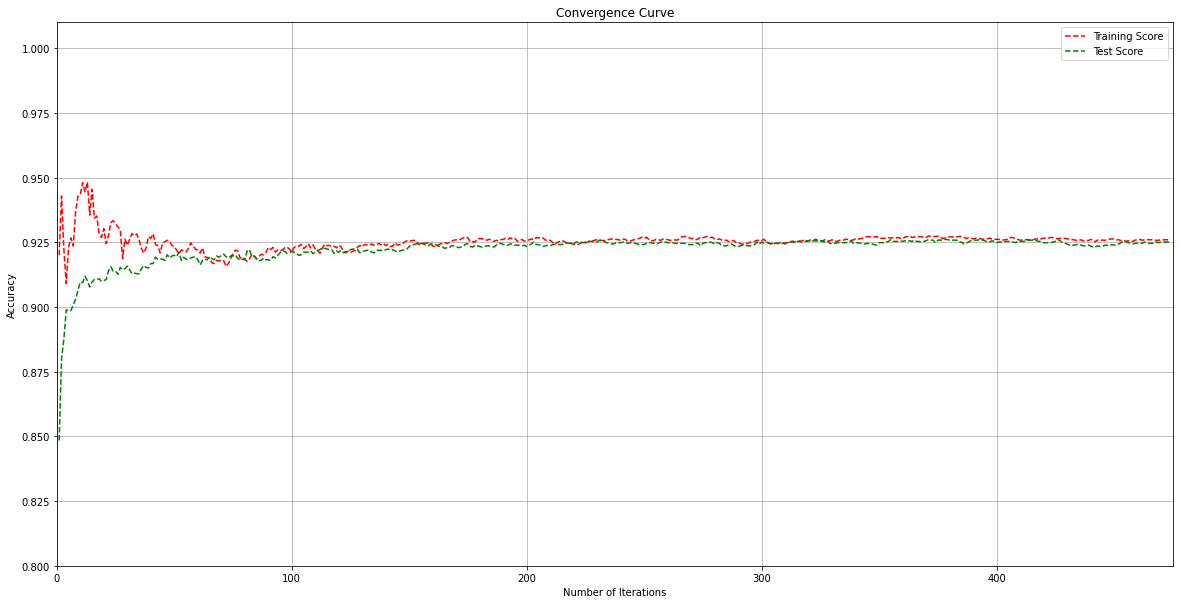

In [42]:
from sklearn.model_selection import learning_curve

# Get the index of the sample with the highest accuracy
max_accuracy_index = result['Best Accuracy(Fitness)'].idxmax()

# Get the training and testing data for the sample with the highest accuracy
X_train, X_test, y_train, y_test = samples[max_accuracy_index]

# Create a SVM classifier with the best hyperparameters for the sample with the highest accuracy
best_kernel = result.loc[max_accuracy_index, 'Best Kernel']
best_C = result.loc[max_accuracy_index, 'Best Nu']
best_gamma = result.loc[max_accuracy_index, 'Best Epsilon']
classifier = SVC(kernel=best_kernel, C=best_C, gamma=best_gamma, max_iter=1000)

# Train the SVM classifier with the training data and track the number of iterations
train_sizes, train_scores, test_scores = [], [], []
iterations = 0
for batch_size in range(50, len(X_train), 20):
    classifier.fit(X_train[:batch_size], y_train[:batch_size])
    train_sizes.append(batch_size)
    train_scores.append(classifier.score(X_train[:batch_size], y_train[:batch_size]))
    test_scores.append(classifier.score(X_test, y_test))
    iterations += 1

# Plot the learning curve
plt.figure(figsize=(20, 10))
plt.title('Convergence Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.01)
plt.xlim(0, iterations+1)
plt.grid()

plt.plot(range(1, iterations + 1), train_scores, '--', color='r', label='Training Score')
plt.plot(range(1, iterations + 1), test_scores, '--', color='g', label='Test Score')
plt.legend(loc='best')
plt.show()

